# Section 1: Manually Creating Data Frames

Import pandas

In [1]:
import pandas as pd

/Users/richardknoche/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1041: UserWarning: Duplicate key in file "/Users/richardknoche/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


Create a dataframe from lists

In [4]:
df = pd.DataFrame([[1,2,3],[1,2,3]],columns=['a','b','c'],index=[0,1])
df

,a,b,c
0,1,2,3
1,1,2,3


Create a dataframe from a dictionary

In [6]:
df = pd.DataFrame( {'a':[1,1],
                   'b':[2,2],
                   'c':[3,3]},index=[0,1])
df

,a,b,c
0,1,2,3
1,1,2,3


# Section 2: Loading existing data frames

Load "PivotThis.csv" into a dataframe.  Drop uneeded columns and rows

In [8]:
df=pd.read_csv('PivotThis.csv')
df=df.ix[0:5,'Count':'Type']
df

,Count,Name,Type
0,1.0,Bob,A
1,3.0,Bob,A
2,2.0,Bob,B
3,1.0,Tom,C
4,4.0,Sarah,A
5,5.0,Sarah,C


Create a pivot table with indicies of name and columns of "type", then save it to "PivotThisSaved.csv"

In [9]:
import numpy as np
df.pivot_table(index='Name',columns='Type',aggfunc=np.sum)

Count          
Type      A    B    C
Name                 
Bob     4.0  2.0  NaN
Sarah   4.0  NaN  5.0
Tom     NaN  NaN  1.0

Load the "birth_data_table" table from richardknoche@localhost/crunchbase_db into a dataframe

Save the dataframe to a "test_table" table

In [12]:
from sqlalchemy import create_engine
engine=create_engine('postgres://richardknoche@localhost/crunchbase_db')
df = pd.read_sql('SELECT * FROM test_table LIMIT 10;',engine)
df.drop('index',axis=1,inplace=True)
df

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_total_usd,raised_amount_each
0,/organization/andrewburnett-com-ltd,AndrewBurnett.com Ltd,|Internet|SEO|Services|Public Relations|Social...,Internet,GBR,None,Edinburgh,Edinburgh,/organization/ekaf,Ekaf,...,None,/funding-round/14fe2864e02d0f15ddc3ec8eacdc8e1b,seed,None,1974-01-01,1974-01,1974-Q1,1974,None,-
1,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/antonio-murroni,ANTONIO MURRONI,...,None,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,None,1979-01-01,1979-01,1979-Q1,1979,"1,000,000",#DIV/0!
2,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/filippo-murroni,FILIPPO Murroni,...,None,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,None,1979-01-01,1979-01,1979-Q1,1979,"1,000,000",#DIV/0!
3,/organization/ikro,Ikro,None,None,BRA,None,BRA - Other,Canoas,/organization/crp-companhia-de-participacoes,CRP Companhia de Participac?o?es,...,None,/funding-round/46c353a8249170cc4b6ab89a522fefdc,venture,A,1982-06-01,1982-06,1982-Q2,1982,"724,000",#DIV/0!
4,/organization/indelsul,Indelsul,None,None,None,None,None,None,/organization/crp-companhia-de-participacoes,CRP Companhia de Participac?o?es,...,None,/funding-round/48e8db0d90f95934831603622cb3f46a,venture,A,1982-12-01,1982-12,1982-Q4,1982,"165,000",#DIV/0!
5,/organization/laborat-rios-noli,Laboratórios Noli,None,None,BRA,None,Porto Alegre,Porto Alegre,/organization/crp-companhia-de-participacoes,CRP Companhia de Participac?o?es,...,None,/funding-round/5bdff09243b72f7fb325146259880e93,venture,A,1982-12-01,1982-12,1982-Q4,1982,"155,000",#DIV/0!
6,/organization/polimax,Polimax,None,None,None,None,None,None,/organization/crp-companhia-de-participacoes,CRP Companhia de Participac?o?es,...,None,/funding-round/b046f5d59bc7a5bc86ddfb69c70adf77,venture,A,1983-06-01,1983-06,1983-Q2,1983,"94,000",#DIV/0!
7,/organization/lenovo,Lenovo,|Hardware|,Hardware,USA,NC,Raleigh,Morrisville,/organization/chinese-academy-of-sciences,Chinese Academy Of Sciences,...,Beijing,/funding-round/0f444f3fdb0c1058aa70eeba9f0f5089,undisclosed,None,1984-01-01,1984-01,1984-Q1,1984,None,-
8,/organization/mixertech,Mixertech,None,None,None,None,None,None,/organization/crp-companhia-de-participacoes,CRP Companhia de Participac?o?es,...,None,/funding-round/4316813c5da6e06f2a15fa25c7946a73,venture,A,1984-05-01,1984-05,1984-Q2,1984,None,-
9,/organization/aeromot,Aeromot,None,None,BRA,None,Porto Alegre,Porto Alegre,/organization/crp-companhia-de-participacoes,CRP Companhia de Participac?o?es,...,None,/funding-round/095f50e9e2c806d6a873a9f299c4b1d1,venture,A,1985-05-01,1985-05,1985-Q2,1985,"243,000",#DIV/0!


In [ ]:
df.to_sql(tablename,engine)

# EDITING A DATAFRAME

In [13]:
df = pd.DataFrame({'a': [1,2,7,None,4,5],
                   'b': [2,3,8,None,2,11],
                   'c': [3,4,9,None,3,12]},index=[0,1,2,3,4,5])

df

,a,b,c
0,1.0,2.0,3.0
1,2.0,3.0,4.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN
4,4.0,2.0,3.0
5,5.0,11.0,12.0


Drop row 1 of the table above

In [14]:
df.drop(1,inplace=True)
df

,a,b,c
0,1.0,2.0,3.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN
4,4.0,2.0,3.0
5,5.0,11.0,12.0


Drop column 'a' of the table above, without overriding the original

In [15]:
df.drop('a',axis=1)

,b,c
0,2.0,3.0
2,8.0,9.0
3,NaN,NaN
4,2.0,3.0
5,11.0,12.0


Set the index of the dataframe to 'a', then reset it to numbers 0-4

In [16]:
df.set_index('a')

,b,c
a,,
1.0,2.0,3.0
7.0,8.0,9.0
NaN,NaN,NaN
4.0,2.0,3.0
5.0,11.0,12.0


In [17]:
df.reset_index(drop=True)

,a,b,c
0,1.0,2.0,3.0
1,7.0,8.0,9.0
2,NaN,NaN,NaN
3,4.0,2.0,3.0
4,5.0,11.0,12.0


Sort the dataframe by column c descending, then by column a ascending

In [18]:
df.sort_values(by=['c','a'],ascending =[False,True])

,a,b,c
5,5.0,11.0,12.0
2,7.0,8.0,9.0
0,1.0,2.0,3.0
4,4.0,2.0,3.0
3,NaN,NaN,NaN


Sort the dataframe by index

In [19]:
df.sort_index()

,a,b,c
0,1.0,2.0,3.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN
4,4.0,2.0,3.0
5,5.0,11.0,12.0


Without overwriting, fill all NaN entries with 0

In [20]:
df.fillna(0)

,a,b,c
0,1.0,2.0,3.0
2,7.0,8.0,9.0
3,0.0,0.0,0.0
4,4.0,2.0,3.0
5,5.0,11.0,12.0


Without overwritng, drop all NaN entries

In [21]:
df.dropna()

,a,b,c
0,1.0,2.0,3.0
2,7.0,8.0,9.0
4,4.0,2.0,3.0
5,5.0,11.0,12.0


Without overwritng, drop all entries where column a is a duplicate

In [22]:
df.drop_duplicates(subset=['a'])

,a,b,c
0,1.0,2.0,3.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN
4,4.0,2.0,3.0
5,5.0,11.0,12.0


Rename columns to "A", "B", and "C"

In [23]:
df.columns=['A','B','C']
df

,A,B,C
0,1.0,2.0,3.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN
4,4.0,2.0,3.0
5,5.0,11.0,12.0


# GETTING DATAFRAME INFORMATION

Get the type of data stored in each column

In [24]:
df.info

<bound method DataFrame.info of      A     B     C
0  1.0   2.0   3.0
2  7.0   8.0   9.0
3  NaN   NaN   NaN
4  4.0   2.0   3.0
5  5.0  11.0  12.0>

See the first 4 elements of the data frame, then the last 3

In [25]:
df.head(n=4)

,A,B,C
0,1.0,2.0,3.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN
4,4.0,2.0,3.0


In [26]:
df.tail(n=3)

,A,B,C
3,NaN,NaN,NaN
4,4.0,2.0,3.0
5,5.0,11.0,12.0


Print the shape of the dataframe

In [27]:
df.shape

(5, 3)

Print the columns, then the indicies of the dataframe

In [28]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [29]:
df.index

Int64Index([0, 2, 3, 4, 5], dtype='int64')

Count the number of times each value of column "A" appears

In [32]:
df['A'].value_counts()

7.0    1
5.0    1
4.0    1
1.0    1
Name: A, dtype: int64

# INDEXING A DATAFRAME

In [33]:
df.sort_values('C',inplace=True)
df

,A,B,C
0,1.0,2.0,3.0
4,4.0,2.0,3.0
2,7.0,8.0,9.0
5,5.0,11.0,12.0
3,NaN,NaN,NaN


Select the everything between index label 4 and label 5 (inclusive)

In [34]:
df.loc[4:5]

,A,B,C
4,4.0,2.0,3.0
2,7.0,8.0,9.0
5,5.0,11.0,12.0


Select the 2nd-4th index labels (inclusive), and columns A and C only

In [35]:
df.iloc[1:4]

,A,B,C
4,4.0,2.0,3.0
2,7.0,8.0,9.0
5,5.0,11.0,12.0


Select columns A-C, and index labels 4 through 5 (with .ix)

In [36]:
df.ix[4:5,'A':'C']

,A,B,C
4,4.0,2.0,3.0
2,7.0,8.0,9.0
5,5.0,11.0,12.0


Select all entries where A<4 and C is not greater than 6

In [37]:
df[ (df['A']<4) & ~(df['C']>6)]

,A,B,C
0,1.0,2.0,3.0


Randomly sample 3 rows of the dataframe

In [38]:
df.sample(n=3)

,A,B,C
3,NaN,NaN,NaN
5,5.0,11.0,12.0
4,4.0,2.0,3.0


Randomly sample half of the dataframe, specify a specifc random seed

In [39]:
df.sample(frac=0.5,random_state=100)

,A,B,C
4,4.0,2.0,3.0
2,7.0,8.0,9.0


Drop all NaN values using indexing

In [41]:
df[ df['A'].notnull()]

,A,B,C
0,1.0,2.0,3.0
4,4.0,2.0,3.0
2,7.0,8.0,9.0
5,5.0,11.0,12.0


Drop all Nan Values without indexing

In [43]:
df.dropna()

,A,B,C
0,1.0,2.0,3.0
4,4.0,2.0,3.0
2,7.0,8.0,9.0
5,5.0,11.0,12.0


Select only NaN values using indexing

In [44]:
df[ df['A'].isnull()]

,A,B,C
3,NaN,NaN,NaN


# AGGREGATE INFORMATION FROM DATAFRAME

Calculate the cumulative sum of column A

In [45]:
df['A'].cumsum()

0     1.0
4     5.0
2    12.0
5    17.0
3     NaN
Name: A, dtype: float64

Group the dataframe according to values of A, and compute the sum of other columns within each group

In [46]:
df.groupby('A').sum()

,B,C
A,,
1.0,2.0,3.0
4.0,2.0,3.0
5.0,11.0,12.0
7.0,8.0,9.0


# APPLYING FUNCTIONS TO ROWS OR COLUMNS OF A DATAFRAME

In [47]:
#Example dataframe:
df = pd.DataFrame({'A': [1, 2, 3, 4],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': [3, 4, 5, 6]},
                    index=[0, 1, 2, 3])

df

,A,B,C
0,1,B0,3
1,2,B1,4
2,3,B2,5
3,4,B3,6


Using a function, return the sum of index 0 and index 2 for each column, multiplied by some factor specified by an argument

In [48]:
def MyFunc(col,factor):
    return factor*(col[0]+col[2])

df.apply(MyFunc,args=[5])

A                      20
B    B0B2B0B2B0B2B0B2B0B2
C                      40
dtype: object

Using a function, return the sum of column A and column C for each row, multiplied by some factor specified by an argument

In [49]:
def MyFunc(row,factor):
    return factor*(row['A']+row['C'])

df.apply(MyFunc,axis=1,args=[5])

0    20
1    30
2    40
3    50
dtype: int64

Write the above function as a lambda function

In [50]:
df.apply(lambda x: x['A']+x['C'],axis=1)

0     4
1     6
2     8
3    10
dtype: int64

Write a function that replaces every element of the dataframe with the max of the dataframe

In [52]:
df.applymap(lambda x: max(df))

,A,B,C
0,C,C,C
1,C,C,C
2,C,C,C
3,C,C,C


# Element-wise operations on dataframes

In [53]:
import numpy as np
df1=pd.DataFrame(np.random.randn(10, 5),columns=['a', 'b', 'c', 'd', 'e'])
df2=pd.DataFrame(np.random.randn(11, 6),columns=['a', 'b', 'c', 'd', 'e','f'])

Multiply the two dataframes above, replacing missing values with zero

In [54]:
df1.mul(df2,fill_value=0)

,a,b,c,d,e,f
0,-0.070597,-0.260321,2.128547,-1.768940,0.159748,0.0
1,-0.992578,-0.319081,-0.027010,0.759494,1.655257,0.0
2,-2.911337,0.315753,1.485622,-0.033086,0.341654,0.0
3,-0.427795,-3.398403,0.602298,1.379350,0.179868,0.0
4,-1.215143,-1.151590,-0.087511,-0.708950,-0.085311,-0.0
5,-0.083591,1.319151,1.304580,-0.305821,0.198668,0.0
6,-0.251827,-0.004024,0.933376,-0.348415,0.542387,0.0
7,-0.291405,0.491327,-1.164352,0.142382,0.167266,0.0
8,-0.968301,0.245675,0.091127,-0.915926,0.276856,0.0
9,-0.014085,1.081709,-2.111394,1.603656,2.385148,-0.0


# Concatinating Dataframe

In [55]:
df1=pd.DataFrame({'A':[1,2,3],'B':[1,2,3]})
df2=pd.DataFrame({'A':[4,5,6],'B':[4,5,6]})

Add the rows of df2 below the rows of df1

In [56]:
pd.concat([df1,df2])

,A,B
0,1,1
1,2,2
2,3,3
0,4,4
1,5,5
2,6,6


In [57]:
#If the dataframes have the some number of rows, we concatinate the columns
df1=pd.DataFrame({'A':[1,2,3],'B':[1,2,3]})
df2=pd.DataFrame({'C':[4,5,6],'D':[4,5,6]})

Add the columns of df1 to the columns of df2

In [58]:
pd.concat([df1,df2],axis=1)

,A,B,C,D
0,1,1,4,4
1,2,2,5,5
2,3,3,6,6


# Joining dataframes

Explain the four common types of joins

In [59]:
left = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b'],
                 'ounces': [1, 2, 3, 4, 5, 6]})

left

,group,ounces
0,a,1
1,a,2
2,a,3
3,b,4
4,b,5
5,b,6


In [60]:
right = pd.DataFrame({'label': ['b','c'],
                     'value': ['beta','charlie']})
right

,label,value
0,b,beta
1,c,charlie


Join left and right together, using a full outer join

In [61]:
left.merge(right,how='outer',left_on='group',right_on='label')

,group,ounces,label,value
0,a,1.0,NaN,NaN
1,a,2.0,NaN,NaN
2,a,3.0,NaN,NaN
3,b,4.0,b,beta
4,b,5.0,b,beta
5,b,6.0,b,beta
6,NaN,NaN,c,charlie


Rename the columns so that they have a shared name, the perform an inner join

In [62]:
right.columns=['group','value']

In [63]:
left.merge(right,how='outer',on='group')

,group,ounces,value
0,a,1.0,NaN
1,a,2.0,NaN
2,a,3.0,NaN
3,b,4.0,beta
4,b,5.0,beta
5,b,6.0,beta
6,c,NaN,charlie


# Plotting

In [64]:
%matplotlib inline

df = pd.DataFrame({'A': [1, 2, 3, 4],
                    'B': [3, 4, 5, 6]},
                    index=[0, 1, 2, 3])

df

,A,B
0,1,3
1,2,4
2,3,5
3,4,6


Plot a scatter plot of columns A and B

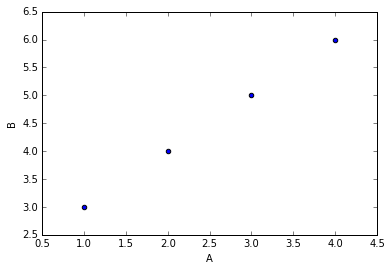

In [65]:
df.plot.scatter('A','B')